Coordinate of Bounding box : rectangles[[(118, 180) (304, 366)]] 

coordinate of nose :  (217, 274)
refined (x,y) : (124,181)


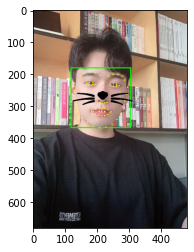

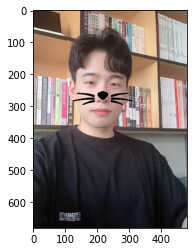

In [168]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

#이미지 불러오기 @
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_me.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480,680))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
#print("BGR image 출력 : ")#
#plt.imshow(img_bgr)#
#plt.show()#



#bgr->rgb
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#print("RGB image 출력 : ")#
#plt.imshow(img_rgb)#
#plt.show()#




#- detector 선언
detector_hog = dlib.get_frontal_face_detector()   





#face_bounding box coordinate
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("Coordinate of Bounding box :",dlib_rects,"\n")




#print Bounding box on RGB Image 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Bounding Box on RGB :")#
#plt.show()#


#import Landmark Model - bz2
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#make list of points about landmarks 
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


#Landmarks on RGB Image    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Landmarks on RGB Image : ")#
#plt.show()#

#find coordinate of nose
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("coordinate of nose : ",landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    #print ('(x,y) : (%d,%d)'%(x,y))
    #print ('(w,h) : (%d,%d)'%(w,h))
    
    

#import sticker
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/whisker.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
#print (img_sticker.shape)


#sticker가 시작하는 지점 x,y
# x는 코가 sticker의 중심에 와야함 - 
#y는 left

#coordinate of sticker
refined_x = x-w//2   # left
refined_y = y-h//2     # top
print ('refined (x,y) : (%d,%d)'%(refined_x, refined_y))


#refined coordinate of sticker@@@@@@@ 조건문으로 수정 필요 
'''
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

'''




#sticker이미지에 대해 선택적으로 적용(rgb가 0인 부분 사용 x) 
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#result
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()



#final result
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()




# 회전 실패

Coordinate of Bounding box : rectangles[[(118, 263) (304, 449)]] 

coordinate of nose :  (206, 363)
(187, 187, 3)
refined (x,y) : (113,270)


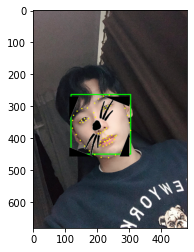

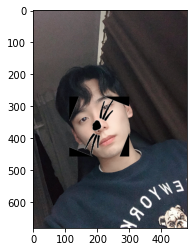

In [117]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
from math import *

#이미지 불러오기 @
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480,680))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
#print("BGR image 출력 : ")#
#plt.imshow(img_bgr)#
#plt.show()#



#bgr->rgb
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#print("RGB image 출력 : ")#
#plt.imshow(img_rgb)#
#plt.show()#




#- detector 선언
detector_hog = dlib.get_frontal_face_detector()   





#face_bounding box coordinate
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("Coordinate of Bounding box :",dlib_rects,"\n")




#print Bounding box on RGB Image 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Bounding Box on RGB :")#
#plt.show()#


#import Landmark Model - bz2
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#make list of points about landmarks 
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


#Landmarks on RGB Image    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
#plt.imshow(img_show_rgb)#
#print("Landmarks on RGB Image : ")#
#plt.show()#

#find coordinate of nose
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("coordinate of nose : ",landmark[30]) # nose center index : 30
    x_nose=landmark[29][0]
    y_nose=landmark[29][1]
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    #print ('(x,y) : (%d,%d)'%(x,y))
    #print ('(w,h) : (%d,%d)'%(w,h))
    
    
#find angle 
wid=abs(x_nose-x)
hei=abs(y_nose-y)
if x_nose<x:
    ang=np.arctan(hei/wid)
    ang=degrees(ang)
else:
    ang=np.arctan(hei/wid)
    ang=-degrees(ang)
    
#import sticker
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/whisker.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

height_s,width_s,channel_s=img_sticker.shape
matrix_s=cv2.getRotationMatrix2D((width_s/2,height_s/2),ang,1)
img_sticker=cv2.warpAffine(img_sticker,matrix_s,(width_s,height_s))



#sticker가 시작하는 지점 x,y
# x는 코가 sticker의 중심에 와야함 - 
#y는 left

#coordinate of sticker
refined_x = x-w//2   # left
refined_y = y-h//2     # top
print ('refined (x,y) : (%d,%d)'%(refined_x, refined_y))


#refined coordinate of sticker@@@@@@@ 조건문으로 수정 필요 
if refined_y<0:
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    refined_y = 0
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
    
# 와 이거 어렵다. 






#sticker이미지에 대해 선택적으로 적용(rgb가 0인 부분 사용 x) 
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#result
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()



#final result
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()




# 회전 성공 

Coordinate of Bounding box : rectangles[[(118, 263) (304, 449)]] 

coordinate of nose :  (206, 363)
각도는 28.495638618244982
(187, 187, 3)
refined (x,y) : (113,270)


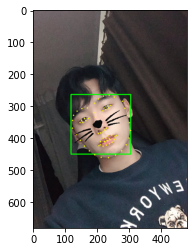

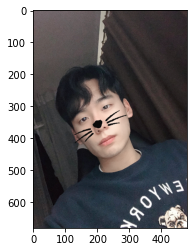

In [163]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
from math import *


#이미지 불러오기 @
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_mee.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480,680))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
#print("BGR image 출력 : ")#
#plt.imshow(img_bgr)#
#plt.show()#



#bgr->rgb
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#print("RGB image 출력 : ")#
#plt.imshow(img_rgb)#
#plt.show()#




#- detector 선언
detector_hog = dlib.get_frontal_face_detector()   





#face_bounding box coordinate
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("Coordinate of Bounding box :",dlib_rects,"\n")




#print Bounding box on RGB Image 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Bounding Box on RGB :")#
#plt.show()#


#import Landmark Model - bz2
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#make list of points about landmarks 
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


#Landmarks on RGB Image    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Landmarks on RGB Image : ")#
#plt.show()#

#find coordinate of nose
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("coordinate of nose : ",landmark[30]) # nose center index : 30
    x_eye_l=landmark[37][0]
    y_eye_l=landmark[37][1]
    x_eye_r=landmark[43][0]
    y_eye_r=landmark[43][1]
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    #print ('(x,y) : (%d,%d)'%(x,y))
    #print ('(w,h) : (%d,%d)'%(w,h))
    
    
#find angle 
wid=abs(x_eye_l-x_eye_r)
hei=abs(y_eye_l-y_eye_r)
if y_eye_l >=y_eye_r:
    ang=np.arctan(hei/wid)
    ang=degrees(ang)
else:
    ang=np.arctan(hei/wid)
    ang=-degrees(ang)

    
    
print("각도는",ang)
#import sticker
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/whisker.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

whisker_c=10

img_sticker=np.where(img_sticker==0 ,whisker_c,img_sticker).astype(np.uint8)

height_s,width_s,channel_s=img_sticker.shape
matrix_s=cv2.getRotationMatrix2D((width_s/2,height_s/2),ang,1)
img_sticker=cv2.warpAffine(img_sticker,matrix_s,(width_s,height_s))



#sticker가 시작하는 지점 x,y
# x는 코가 sticker의 중심에 와야함 - 
#y는 left

#coordinate of sticker
refined_x = x-w//2   # left
refined_y = y-h//2     # top
print ('refined (x,y) : (%d,%d)'%(refined_x, refined_y))


#refined coordinate of sticker@@@@@@@ 조건문으로 수정 필요 
if refined_y<0:
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    refined_y = 0
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
    
# 와 이거 어렵다. 





#sticker이미지에 대해 선택적으로 적용(rgb가 0인 부분 사용 x) 
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=whisker_c ,sticker_area,img_sticker).astype(np.uint8)


#result
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()





#final result
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=whisker_c,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()




 # 반대 회전 



Coordinate of Bounding box : rectangles[[(52, 260) (319, 528)]] 

coordinate of nose :  (191, 406)
각도는 : -27.01266534793854
(268, 268, 3)
refined (x,y) : (57,272)


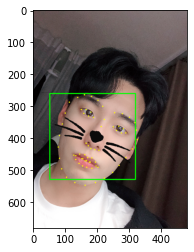

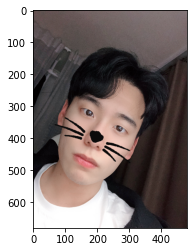

In [173]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
from math import *


#이미지 불러오기 @
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_right.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480,680))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
#print("BGR image 출력 : ")#
#plt.imshow(img_bgr)#
#plt.show()#



#bgr->rgb
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#print("RGB image 출력 : ")#
#plt.imshow(img_rgb)#
#plt.show()#




#- detector 선언
detector_hog = dlib.get_frontal_face_detector()   





#face_bounding box coordinate
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("Coordinate of Bounding box :",dlib_rects,"\n")




#print Bounding box on RGB Image 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Bounding Box on RGB :")#
#plt.show()#


#import Landmark Model - bz2
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#make list of points about landmarks 
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


#Landmarks on RGB Image    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Landmarks on RGB Image : ")#
#plt.show()#

#find coordinate of nose
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("coordinate of nose : ",landmark[30]) # nose center index : 30
    x_eye_l=landmark[37][0]
    y_eye_l=landmark[37][1]
    x_eye_r=landmark[43][0]
    y_eye_r=landmark[43][1]
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    #print ('(x,y) : (%d,%d)'%(x,y))
    #print ('(w,h) : (%d,%d)'%(w,h))
    
    
#find angle 
wid=abs(x_eye_l-x_eye_r)
hei=abs(y_eye_l-y_eye_r)
if y_eye_l >=y_eye_r:
    ang=np.arctan(hei/wid)
    ang=degrees(ang)
else:
    ang=np.arctan(hei/wid)
    ang=-degrees(ang)
    
    
print("각도는 :",ang)
#import sticker
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/whisker.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

whisker_c=10

img_sticker=np.where(img_sticker==0 ,whisker_c,img_sticker).astype(np.uint8)

height_s,width_s,channel_s=img_sticker.shape
matrix_s=cv2.getRotationMatrix2D((width_s/2,height_s/2),ang,1)
img_sticker=cv2.warpAffine(img_sticker,matrix_s,(width_s,height_s))



#sticker가 시작하는 지점 x,y
# x는 코가 sticker의 중심에 와야함 - 
#y는 left

#coordinate of sticker
refined_x = x-w//2   # left
refined_y = y-h//2     # top
print ('refined (x,y) : (%d,%d)'%(refined_x, refined_y))


#refined coordinate of sticker@@@@@@@ 조건문으로 수정 필요 
if refined_y<0:
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    refined_y = 0
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
    
# 와 이거 어렵다. 





#sticker이미지에 대해 선택적으로 적용(rgb가 0인 부분 사용 x) 
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=whisker_c ,sticker_area,img_sticker).astype(np.uint8)


#result
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()





#final result
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=whisker_c,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


